In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

nose_cascade = cv2.CascadeClassifier('/Users/arpitsabherwal/Downloads/MMM-nose 2/cascade_files/haarcascade_mcs_nose.xml')

if nose_cascade.empty():
  raise IOError('Unable to load the nose cascade classifier xml file')

In [3]:
cap_thermal = cv2.VideoCapture('/Users/arpitsabherwal/Desktop/thermal/FLIR0020.mov')
cap_normal = cv2.VideoCapture('/Users/arpitsabherwal/Desktop/normal/test90fps4.mp4')
count=0
y_val=[]
while(cap_normal.isOpened() and cap_thermal.isOpened()):
    
    ret_thermal, frame_thermal = cap_thermal.read()
    ret_normal, frame_normal = cap_normal.read()
    
    gray_normal = cv2.cvtColor(frame_normal, cv2.COLOR_BGR2GRAY)
    nose_rects = nose_cascade.detectMultiScale(gray_normal, 1.3, 5)
    
    for (x,y,w,h) in nose_rects:
        frame=cv2.rectangle(frame_normal, (x,y), (x+w+20,y+h), (0,255,0), 3)

        #frame=cv2.rectangle(frame_thermal, (int(1.4*x),int(.9*y)), (x+int(2.5*w),y+int(.4*h)), (0,255,0), 3)
        #tmp1 = cv2.cvtColor(frame_thermal[int(.9*y):y+int(.4*h),int(1.4*x):x+int(2.5*w)], cv2.COLOR_BGR2GRAY)

        frame=cv2.rectangle(frame_thermal, (x+80,y), (x+w+20+80,y+h), (0,255,0), 3)
        tmp1 = cv2.cvtColor(frame_thermal[y:y+h,x+80:x+w+20+80], cv2.COLOR_BGR2GRAY)
        
        histeq = cv2.equalizeHist(tmp1)
        #plt.imshow(histeq)
        y_val.append(np.average(histeq))
        name = "video_frames/frame%d.jpg"%count
        cv2.imwrite(name, frame)
        count=count+1

    
    


TypeError: 'NoneType' object is not subscriptable

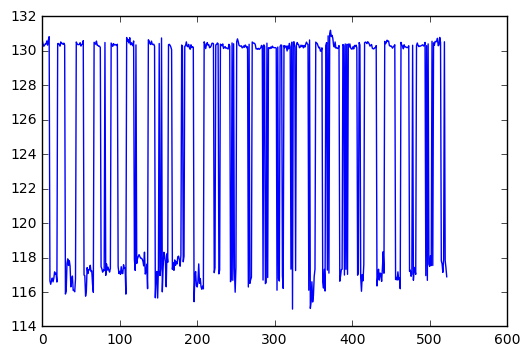

In [4]:
plt.plot(y_val)

In [5]:
import scipy
from scipy import interpolate
from scipy import signal

In [6]:
f = interpolate.interp1d(np.arange(len(y_val)),np.array(y_val))
xx = np.linspace(0,len(y_val)-1, 10000)
yy = f(xx)
window = scipy.signal.gaussian(200, 6000)

smoothed = scipy.signal.convolve(yy, window/window.sum(), mode='same')

xx[np.argmax(smoothed)]

376.19081908190816

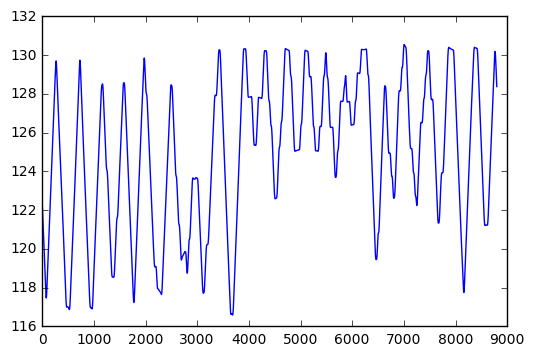

In [7]:
plt.plot(smoothed[200:9000])

In [8]:
from scipy.signal import argrelextrema
import numpy as np
maxm = argrelextrema(smoothed, np.greater,order=100)  # (array([1, 3, 6]),)
minm = argrelextrema(smoothed, np.less,order=100)

In [9]:
maxm

(array([ 100,  469,  930, 1367, 1784, 2176, 2695, 3180, 3625, 4134, 4506,
        4908, 5291, 5689, 6073, 6471, 6834, 7206, 7667, 8069, 8567, 8965,
        9363, 9760]),)

In [10]:
minm

(array([ 278,  726, 1165, 1580, 1974, 2508, 3007, 3318, 3886, 4334, 4708,
        5091, 5541, 5877, 6183, 6662, 7006, 7452, 7869, 8361, 8769, 9152,
        9568]),)

In [11]:
new_array=np.sort(np.concatenate((minm,maxm),axis=1))

In [12]:
new_array

array([[ 100,  278,  469,  726,  930, 1165, 1367, 1580, 1784, 1974, 2176,
        2508, 2695, 3007, 3180, 3318, 3625, 3886, 4134, 4334, 4506, 4708,
        4908, 5091, 5291, 5541, 5689, 5877, 6073, 6183, 6471, 6662, 6834,
        7006, 7206, 7452, 7667, 7869, 8069, 8361, 8567, 8769, 8965, 9152,
        9363, 9568, 9760]])

In [13]:
new_array.shape

(1, 47)

In [14]:
new_y_val=[]
for i in range(new_array.shape[1]):
    new_y_val.append(smoothed[new_array[0][i]])

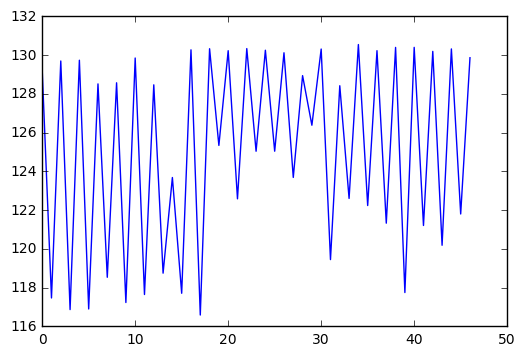

In [15]:
plt.plot(np.arange(len(new_y_val)),new_y_val)

In [16]:
f = interpolate.interp1d(np.arange(len(new_y_val)),np.array(new_y_val))
xx = np.linspace(0,len(new_y_val)-1, 10000)
yy = f(xx)
window = scipy.signal.gaussian(200, 6000)

smoothed = scipy.signal.convolve(yy, window/window.sum(), mode='same')

xx[np.argmax(smoothed)]

24.000600060005997

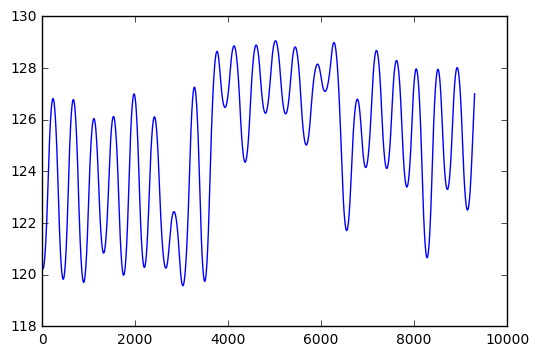

In [17]:
plt.plot(smoothed[200:9500])